In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from pandas_datareader import data as pdr 
import fix_yahoo_finance as yf 

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

from google.colab import drive

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=379473bd41848b03929c8116f7d623194b1cb82697a01675b652a143cdbdfaa3
  Stored in directory: /tmp/pip-ephem-wheel-cache-y5yrwil3/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
df_full = pdr.get_data_yahoo("AMZN", start="2018-01-01").reset_index()
df_full.to_csv('AMZN.csv', index=False)

[*********************100%***********************]  1 of 1 downloaded


In [0]:
df_full.shape

(423, 7)

In [0]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500
1,2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800
2,2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100
3,2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700
4,2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500


In [0]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,423.000000,423.000000,423.000000,423.000000,423.000000,4.230000e+02
mean,1705.390588,1722.652885,1684.253713,1704.351017,1704.351017,5.088616e+06
std,187.169373,184.544913,188.640463,186.002164,186.002164,2.323576e+06
min,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,1.690300e+06
25%,1584.224976,1595.215027,1567.075012,1582.289978,1582.289978,3.410900e+06
50%,1706.260010,1724.800049,1691.520020,1710.630005,1710.630005,4.529700e+06
75%,1851.565002,1868.750000,1833.660034,1856.419983,1856.419983,6.082600e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,1.496380e+07


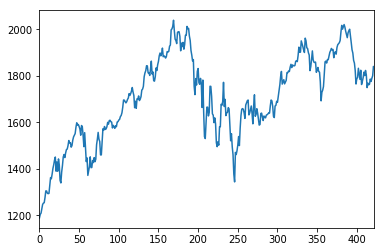

In [0]:
df_full["Adj Close"].plot()

In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
window_size=32
num_samples=len(df_full)-window_size

indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)
data = df_full['Adj Close'].values[indices]
x = data[:,:-1]
y = data[:,-1]

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train=x[:ind_split]
y_train=y[:ind_split]
x_test=x[ind_split:]
y_test=y[ind_split:]

In [0]:
y_test.shape

(79,)

In [0]:
def get_performance (model_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))

def get_plot (model_pred):
    plt.scatter(model_pred, y_test, color="gray")
    plt.plot(y_test, y_test, color='red', linewidth=2)

In [0]:
y_pred_lag=np.roll(y_test, 1)

In [0]:
np.roll(y,1)

array([1833.51001 , 1448.689941, 1468.349976, 1482.920044, 1485.339966,
       1500.      , 1521.949951, 1511.97998 , 1512.449951, 1493.449951,
       1500.25    , 1523.609985, 1537.640015, 1545.      , 1551.859985,
       1578.890015, 1598.390015, 1588.180054, 1591.      , 1582.319946,
       1571.680054, 1544.930054, 1586.51001 , 1581.859985, 1544.920044,
       1495.560059, 1555.859985, 1497.050049, 1431.420044, 1447.339966,
       1371.98999 , 1392.050049, 1410.569946, 1451.75    , 1405.22998 ,
       1406.079956, 1436.219971, 1427.050049, 1448.5     , 1430.790039,
       1441.5     , 1503.829956, 1527.839966, 1556.910034, 1527.48999 ,
       1517.859985, 1460.089966, 1460.170044, 1517.959961, 1572.619995,
       1566.130005, 1582.26001 , 1569.680054, 1572.079956, 1580.949951,
       1600.140015, 1592.390015, 1608.      , 1609.079956, 1602.910034,
       1601.540039, 1576.119995, 1587.280029, 1581.76001 , 1574.369995,
       1585.459961, 1581.400024, 1601.859985, 1603.069946, 1610.

In [0]:
get_performance(y_pred_lag)

Mean Absolute Error: 21.0387
Mean Squared Error: 738.2087
Root Mean Squared Error: 27.17


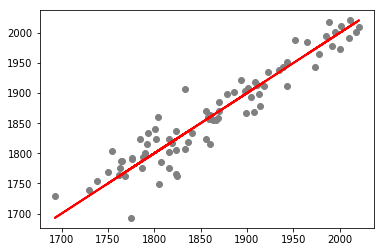

In [0]:
get_plot(y_pred_lag)

In [0]:
#Linear_Regression_Model
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
?model_lr.fit()

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [0]:
get_performance(y_pred_lr)

Mean Absolute Error: 23.3562
Mean Squared Error: 885.6029
Root Mean Squared Error: 29.7591


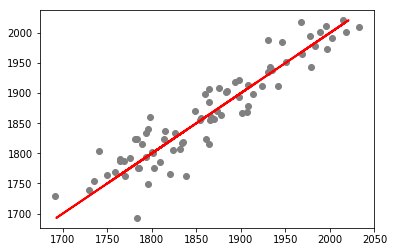

In [0]:
get_plot(y_pred_lr)

In [0]:
#Ridge_Regression_Model
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

y_pred_ridge=model_ridge.predict(x_test)

In [0]:
get_performance(y_pred_ridge)

Mean Absolute Error: 23.3562
Mean Squared Error: 885.6018
Root Mean Squared Error: 29.7591


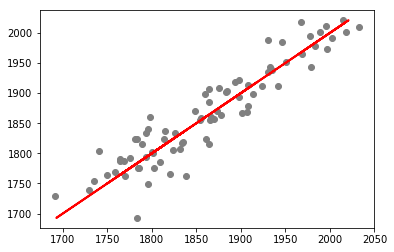

In [0]:
get_plot(y_pred_ridge)

In [0]:
model_ridge.coef_

array([-0.01869006,  0.10340057, -0.03843936, -0.09896329,  0.04371755,
       -0.11503211,  0.1012635 ,  0.07097704, -0.15411282,  0.15655514,
        0.02989199, -0.04255057, -0.06016979, -0.08164919,  0.01353278,
        0.08573665, -0.05568437,  0.15863346, -0.1619152 ,  0.03547912,
        0.08092443, -0.00898912, -0.03785086,  0.14748071, -0.16210539,
        0.03326227, -0.10078207,  0.04473501,  0.02134703,  0.05578948,
       -0.01242382,  0.94304937])

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), "lr":np.absolute(y_test-y_pred_lr), "ridge":np.absolute(y_test-y_pred_ridge)})

In [0]:
df_comp.head()

,lag,lr,ridge
0,74.059936,43.384165,43.384271
1,38.569946,38.368945,38.368756
2,10.030029,3.596752,3.596523
3,1.449951,12.080176,12.080063
4,2.160034,6.433256,6.433300


In [0]:
y_pred_lag

array([1833.51001 , 1907.569946, 1869.      , 1858.969971, 1857.52002 ,
       1859.680054, 1815.47998 , 1823.280029, 1836.430054, 1819.189941,
       1816.319946, 1775.069946, 1692.689941, 1729.560059, 1738.5     ,
       1754.359985, 1804.030029, 1860.630005, 1863.699951, 1855.319946,
       1870.300049, 1869.670044, 1886.030029, 1901.369995, 1908.790039,
       1918.189941, 1911.300049, 1913.900024, 1878.27002 , 1897.829956,
       1904.280029, 1893.630005, 1922.189941, 1934.310059, 1939.      ,
       1942.910034, 1952.319946, 1988.300049, 2017.410034, 2001.069946,
       2011.      , 2020.98999 , 2009.900024, 1992.030029, 1977.900024,
       1964.52002 , 1985.630005, 1994.48999 , 2000.810059, 1973.819946,
       1943.050049, 1912.449951, 1898.530029, 1866.780029, 1855.319946,
       1823.23999 , 1765.130005, 1787.829956, 1793.400024, 1832.890015,
       1807.579956, 1784.920044, 1824.339966, 1762.959961, 1776.119995,
       1792.569946, 1816.119995, 1801.380005, 1823.540039, 1804.

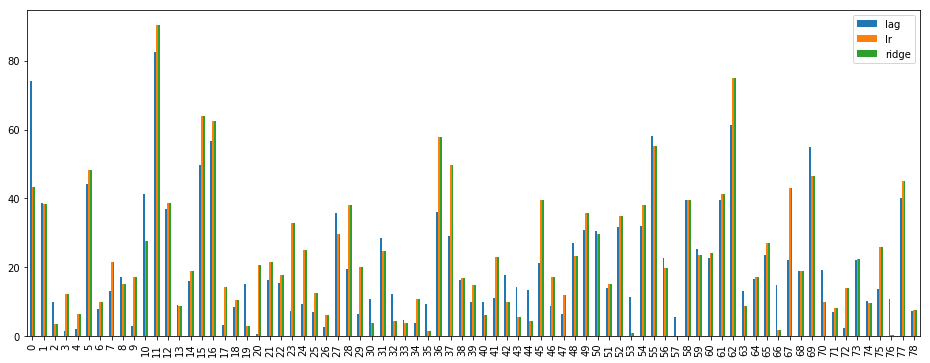

In [0]:
df_comp.plot.bar(figsize=(16, 6))
#plt.ylim(0, 10)
#plt.xlim(9, 20)

(11, 20)

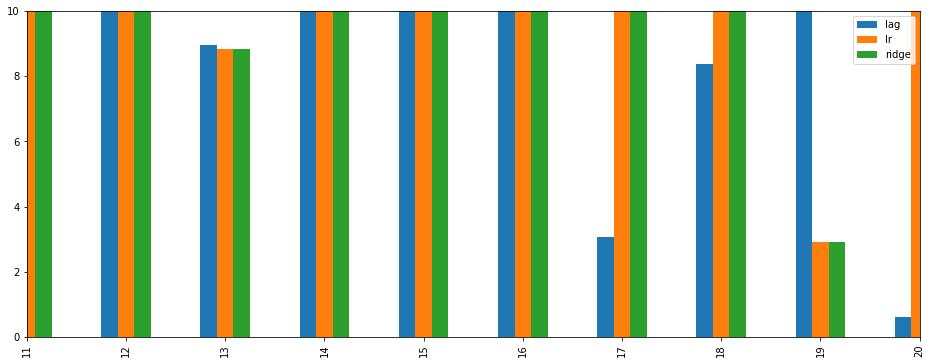

In [0]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0, 10)
plt.xlim(11, 20)